Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?
ref. https://en.wikipedia.org/wiki/Monty_Hall_problem

In [ ]:
import random
import pandas as pd

<AxesSubplot:>

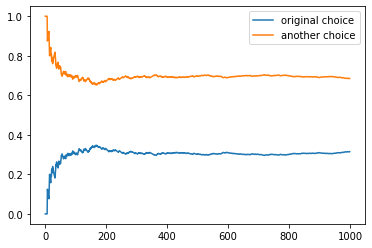

In [2]:
doors = [0, 1, 2]

N = 1000

atari_counter_sonomama, atari_counter_monty, total_counter = 0, 0, 0
sonomama_seikai, monty_seikai = [], []

total_count = []
for _ in range(N):
    # ドアの設定
    door_number = random.choice(doors)                               ## 当たりのドア
    doors_hazure = [door for door in doors if door != door_number]  ## ハズレのドア

    ## ドアの選択(random)
    choice_number = random.choice(doors)

    ## ハズレのドアを教えてくれる(ハズレ)
    teach_hazure = random.choice([door for door in doors_hazure if door != choice_number])  ## 正解ではないドアから1つ選択
    
    ## 残りのドア(教えてくれたハズレドアは避けながら、残りのドアから選択)
    another_door = random.choice([door for door in doors if (door != teach_hazure) and (door != choice_number)])
    
    # 集計
    total_counter += 1
    ## 正解判定
    if choice_number == door_number: ## 元の選択で正解
        atari_counter_sonomama += 1
    if another_door == door_number:  ## ドアを変えて正解
        atari_counter_monty += 1

    total_count.append([atari_counter_sonomama / total_counter, atari_counter_monty / total_counter])

pd.DataFrame(total_count, columns=['original choice', 'another choice']).plot()